In [16]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from scipy.optimize import lsq_linear
import itertools

In [17]:
def generate_Z(A):
    l = list(itertools.product([0, 1], repeat=3))
    #print(l)
    x = np.array(l)
    z = A@x.T
    plt.plot(z[0,:], z[1,:], "o")

In [28]:
def oracle(X, A):
    l = list(itertools.product([0, 1], repeat=3))
    L = np.array(l)
    Z = A@L.T
    X = X.reshape(2)
    x = lsq_linear(Z, X, bounds=(0, 1), verbose = 0)
    if(x.cost != 0.0):
        print(x.cost)
    return(x.cost == 0.0)

6.162975822039155e-29
[[2.18671348]
 [2.88963788]]
2.8596207814261678e-30
[[3.02573516]
 [4.85394933]]
0.016686286780969634
[[1.31494327]
 [0.14043192]]
1.8693942708697485e-27
[[0.04704355]
 [0.96415717]]
7.992191160798525e-21
[[2.18642467]
 [4.24863178]]
9.860761315262648e-32
[[2.03644463]
 [4.76832296]]
6.957753184049324e-28
[[0.75121494]
 [2.34743755]]
0.011894048572594107
[[0.93655486]
 [0.07515804]]
9.860761315262648e-32
[[0.51840187]
 [2.6212985 ]]
0.011620155074463259
[[1.38341721]
 [0.18871478]]
3.944304526105059e-31
[[4.94552875]
 [4.23961852]]
3.4219843404357656e-23
[[3.01422895]
 [1.08962587]]
6.715740519088833e-26
[[3.3654136 ]
 [4.34631894]]
4.930380657631324e-31
[[1.99095611]
 [1.95052261]]
1.9721522630525295e-30
[[2.37177685]
 [2.29538638]]
3.604157663142687e-22
[[5.47852732]
 [4.01066167]]
0.009110678232484152
[[1.50486286]
 [0.23707481]]
0.17795500677589235
[[2.68463777]
 [0.05621685]]
1.4396711520283465e-28
[[1.66984536]
 [4.20208605]]
3.1680584928346627e-25
[[4.38127

2.0930301745240834e-27
[[0.21599304]
 [2.64164853]]
3.496625962392135e-25
[[3.73889302]
 [2.20877994]]
0.006253906005309116
[[0.09367204]
 [4.50247988]]
1.5680751558371993e-23
[[1.9055965 ]
 [2.85948512]]
9.860761315262648e-32
[[3.87901707]
 [2.6285273 ]]
1.5777218104420236e-30
[[2.67055067]
 [4.13180135]]
5.57154198481696e-22
[[3.97730732]
 [2.99821021]]
0.03168024572802697
[[2.25453899]
 [0.30417276]]
3.7447020452306408e-22
[[0.32202146]
 [2.46562157]]
3.944304526105059e-31
[[4.920644  ]
 [4.34409617]]
3.3526588471893e-30
[[3.73725113]
 [3.91648956]]
1.5777218104420236e-30
[[2.072762  ]
 [2.47464497]]
1.6613713342639264e-19
[[1.5319458 ]
 [0.86038044]]
2.5830840133791317e-24
[[4.06271599]
 [9.36591298]]
9.267192787890412e-26
[[3.65155159]
 [4.8900869 ]]
2.8596207814261678e-30
[[3.9236852 ]
 [3.86627306]]
1.2818989709841442e-29
[[3.07223938]
 [2.82387651]]
9.860761315262648e-32
[[2.27730172]
 [2.07018724]]
0.00020555579397294182
[[0.861844  ]
 [0.19456109]]
1.085647523643527e-20
[[0.3

9.860761315262648e-32
[[3.85284062]
 [3.52962436]]
9.791039303547363e-23
[[4.55911495]
 [3.41777284]]
0.027463239753358175
[[3.79453388]
 [0.7070566 ]]
2.465190328815662e-30
[[2.67329058]
 [2.49435496]]
0.0068372509711055775
[[1.54419621]
 [0.26551209]]
1.5777218104420236e-30
[[10.98236314]
 [ 8.63274981]]
7.845918365209886e-24
[[1.87679584]
 [2.57183792]]
0.1438072809095848
[[3.95916764]
 [0.43698953]]
1.6723875842588738e-26
[[1.9883538]
 [0.8423081]]
9.981415307462465e-20
[[0.52479356]
 [1.07630805]]
2.0638881581635823e-27
[[1.40267266]
 [0.70941544]]
0.010787017460168153
[[0.06441545]
 [4.52317355]]
0.0008411414432084954
[[0.56035248]
 [0.09781016]]
2.3098833381002752e-27
[[1.25204893]
 [2.16804608]]
2.5268200870360534e-31
[[0.89055789]
 [3.03570491]]
4.091675497351091e-21
[[3.50710372]
 [1.04520811]]
3.0931334701329026e-26
[[1.29760036]
 [2.96929636]]
0.016076986352320143
[[2.04217837]
 [9.22029104]]
0.052000884180520075
[[2.46094553]
 [0.28281815]]
1.232595164407831e-31
[[2.400519

4.930380657631324e-31
[[4.53837793]
 [2.37666881]]
1.139904008044362e-28
[[4.07222427]
 [1.5668866 ]]
0.10075199990952886
[[3.32684593]
 [0.36900423]]
1.0477058897466563e-31
[[2.60744521]
 [0.89789671]]
9.169108097837519e-21
[[4.81302622]
 [1.81690443]]
2.465190328815662e-32
[[1.48969783]
 [1.85065286]]
4.5450148331193895e-24
[[1.1572906 ]
 [2.37355669]]
1.752439655616691e-19
[[0.28009445]
 [2.44717925]]
1.2507940292968205e-21
[[3.53414373]
 [4.98205122]]
3.944304526105059e-30
[[4.64868875]
 [2.20486943]]
2.121160847291745e-22
[[4.23660757]
 [1.84660499]]
4.4289806662728487e-26
[[3.61650202]
 [4.78378753]]
2.274540844450707e-19
[[1.27971484]
 [0.79655396]]
7.832710368466157e-25
[[1.41105865]
 [3.89881854]]
4.987573073259847e-28
[[3.68575853]
 [3.13826415]]
9.860761315262648e-32
[[2.808533  ]
 [3.92037263]]
1.6023737137301802e-30
[[0.68384214]
 [4.9227006 ]]
2.5007506993088278e-26
[[1.77534966]
 [4.71808411]]
2.465190328815662e-32
[[1.64833142]
 [3.07993977]]
9.860761315262648e-32
[[1.1

2.5390075693337926e-21
[[3.37366179]
 [1.48222347]]
3.944304526105059e-31
[[4.74099367]
 [6.23646928]]
0.004148014390226194
[[0.1538479 ]
 [4.59019974]]
9.860761315262648e-32
[[3.22290405]
 [2.28183375]]
4.4437674300677187e-23
[[0.4531985 ]
 [3.80309724]]
2.873474908166864e-19
[[0.27683994]
 [0.19675989]]
4.229542820915869e-21
[[2.72411749]
 [2.3777514 ]]
0.22886726255287484
[[3.68124335]
 [0.22292792]]
1.9721522630525295e-31
[[2.25508437]
 [0.7814642 ]]
4.640758175214872e-20
[[1.75866458]
 [0.45450718]]
1.5407439555097887e-33
[[0.17296663]
 [3.68422209]]
0.3333100927210583
[[4.6470327 ]
 [0.42936491]]
3.944304526105059e-31
[[3.35904522]
 [2.25625811]]
6.1698783549598386e-27
[[3.45863026]
 [2.17350017]]
1.0274913290503679e-28
[[3.72322752]
 [2.34529668]]
1.535291914595474e-20
[[1.67612051]
 [2.44307853]]
1.4869427180237586e-19
[[4.46072599]
 [1.85838609]]
3.019858152799186e-31
[[0.79138762]
 [1.6550905 ]]
4.600567773919734e-25
[[3.37772625]
 [1.58681682]]
1.7735522633032503e-20
[[2.500

8.028395820912864e-26
[[0.26622663]
 [3.77947876]]
3.3526588471893e-30
[[3.72937515]
 [3.26269614]]
3.5051981348902535e-20
[[1.68560269]
 [0.91724728]]
2.465190328815662e-32
[[1.4805765 ]
 [2.11693791]]
2.336698047354647e-21
[[1.31858565]
 [4.11548911]]
6.162975822039155e-31
[[3.55924601]
 [1.81029748]]
3.7689249758192995e-24
[[0.69323989]
 [2.95559802]]
3.2734504087274334e-22
[[0.1116077 ]
 [3.73689361]]
5.112804741963683e-28
[[0.78322886]
 [2.84586504]]
7.731956314094231e-25
[[1.75136599]
 [1.4961519 ]]
2.573658703283551e-29
[[1.1517646 ]
 [4.65620296]]
2.333469983343544e-24
[[2.23169986]
 [1.16571636]]
5.337630099951671e-28
[[4.81695313]
 [1.60409351]]
1.2108399228710681e-21
[[2.37470593]
 [0.60184122]]
2.465190328815662e-32
[[0.89481476]
 [1.46829257]]
1.1852635100945702e-27
[[3.44603335]
 [2.19079521]]
5.115345505783516e-25
[[0.36942359]
 [2.55548439]]
1.67632942359465e-30
[[3.94344899]
 [3.40278533]]
2.465190328815662e-30
[[3.74847342]
 [4.04989614]]
1.139904008044362e-28
[[3.644

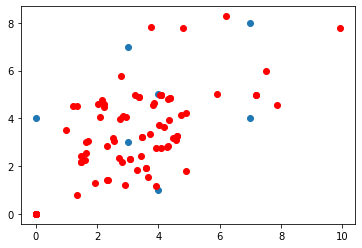

In [30]:
X = np.array([0, 0]).reshape(2,1)
A = np.array([[0, 3, 4], [4, 3, 1]]);
generate_Z(A)
calls = 0
pos = X
out_pos = X
delta = 5
for j in range(1,1000):
    for i in range(1, 100):
        tmpx = X + np.random.uniform(0, delta, (2,1))
        if(oracle(tmpx, A)):
            calls = calls + 1
            X = tmpx
            pos = np.hstack((pos, X))
            #print(pos)
            plt.plot(pos[0, :], pos[1,:], 'ro')
        else:
            print(tmpx)
            break;
    X = np.array([0, 0]).reshape(2,1)
    pos = X
    out_pos = X

plt.show()

In [31]:
print(calls)

65
